In [38]:
import sqlite3
import pandas
con = sqlite3.connect('coal.db')
plant_labels = pandas.read_sql("select orispl_code, unitid from data group by orispl_code, unitid", con)

In [41]:
# Step 1: loading data
import csv
import numpy as np
import os.path
to_ml = []
to_plot = []
labels = []
for i, row in plant_labels.iterrows():
    for year in range(2001, 2017):
        file_name = 'cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.csv'
        if not os.path.isfile(file_name): continue
        with open(file_name, 'rb') as csvfile:
            dr = csv.DictReader(csvfile)
            to_insert = []
            for row in dr:
                to_insert.append(float(row['capacity_factor']))
                if int(row['']) % 24 is 23:
                    to_plot.append(to_insert)
                    to_ml.append(to_insert + np.gradient(to_insert).tolist())
                    labels.append((row['op_date'], row['name'], row['unitid']))
                    to_insert = []
# with open('cf/6481_1SGA_2016.csv', 'rb') as csvfile:
#     dr = csv.DictReader(csvfile)
#     to_insert = []
#     for row in dr:
#         to_insert.append(float(row['capacity_factor']))
#         if int(row['']) % 24 is 23:
#             to_plot.append(to_insert)
#             to_ml.append(to_insert + np.gradient(to_insert).tolist())
#             labels.append((row['op_date'], row['name'], row['unitid']))
#             to_insert = []


In [42]:
# Step 2: normalize data
from sklearn.preprocessing import normalize
normalized = normalize(to_ml)

In [49]:
# Step 3: run kmeans
clusters = 15
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=clusters, random_state=0).fit(normalized)

In [64]:
print normalize(kmeans.cluster_centers_)

[[  3.96208397e-02   2.89401347e-02   2.40157709e-02   1.79576383e-02
    1.52026286e-02   1.40368335e-02   1.43738981e-02   1.37676899e-02
    1.51770510e-02   1.70384719e-02   2.11707559e-02   2.77480264e-02
    3.79659521e-02   5.59823669e-02   8.17178431e-02   1.11982826e-01
    1.68650216e-01   2.03244296e-01   2.38067358e-01   2.77460149e-01
    3.32272390e-01   3.85071925e-01   4.57971442e-01   5.21849248e-01
   -1.06807051e-02  -7.80253442e-03  -5.49124819e-03  -4.40657116e-03
   -1.96040240e-03  -4.14365220e-04  -1.34571764e-04   4.01576404e-04
    1.63539098e-03   2.99685246e-03   5.35477723e-03   8.39759812e-03
    1.41171703e-02   2.18759455e-02   2.80002295e-02   4.34661862e-02
    4.56307348e-02   3.47085715e-02   3.71079267e-02   4.71025160e-02
    5.38058882e-02   6.28495260e-02   6.83886613e-02   6.38778058e-02]
 [  6.19678718e-01   5.82558496e-02   1.31864059e-02   5.41336979e-03
    1.24216353e-02   8.70935807e-03   4.41734020e-03   8.12192322e-03
    2.11064370e-02 

In [50]:
output = kmeans.labels_

In [58]:
import shutil
import os.path
if os.path.exists('kmeans'):
    shutil.rmtree('kmeans')

In [60]:
# Save images to inspect results
import os.path
import matplotlib.pyplot as plt
import random
counts = clusters * [0]
totals = clusters * [np.zeros(24)]
for i in range(clusters):
    if not os.path.exists('kmeans/' + str(i)):
        os.makedirs('kmeans/' + str(i))
for i in range(len(normalized)):
    counts[output[i]] += 1
    totals[output[i]] = to_plot[i] + totals[output[i]]
    # Sample .1% to verify that clusters are working 
    if random.randint(1, 1000) is not 100: continue
    plt.gcf().clear()
    plt.axis([0, 24, 0, 1])
    plt.plot(to_plot[i])
    plt.savefig('kmeans/' + str(output[i]) + '/' + str(labels[i][1]) + '_' + str(labels[i][2]) + '_' + str(labels[i][0]) + '.png')


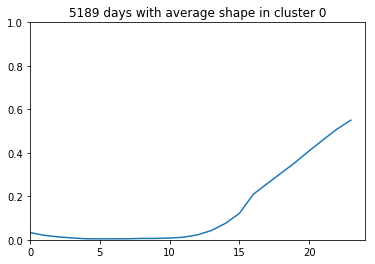

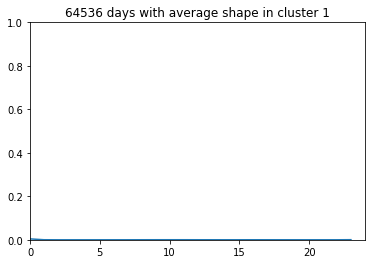

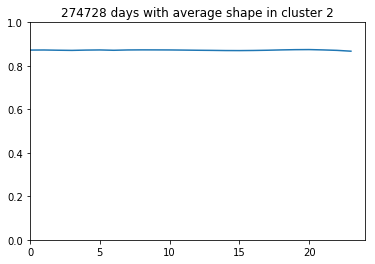

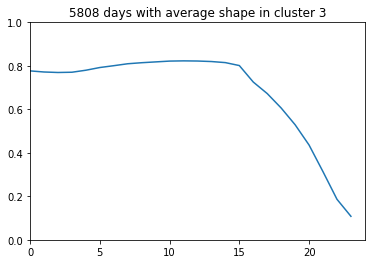

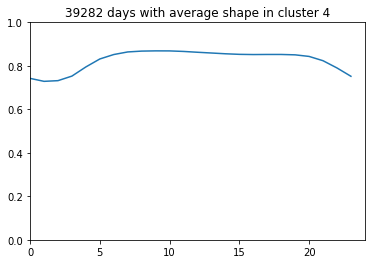

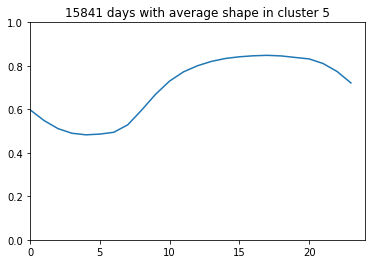

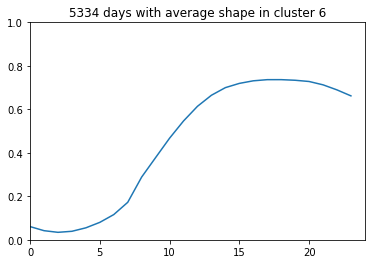

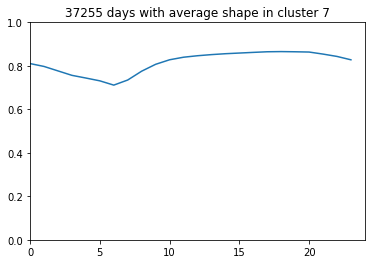

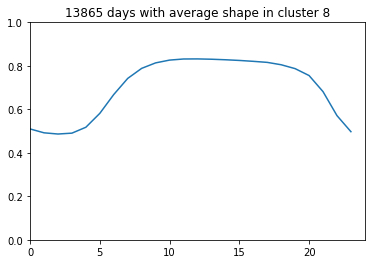

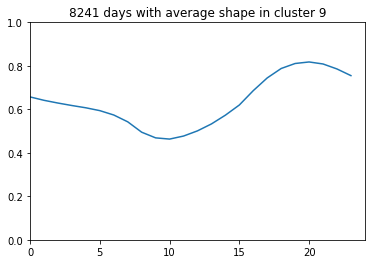

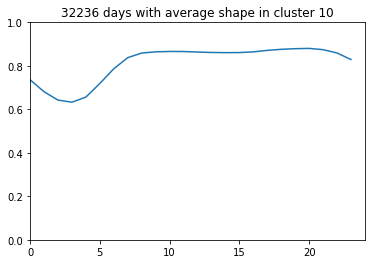

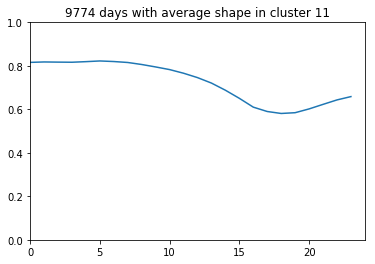

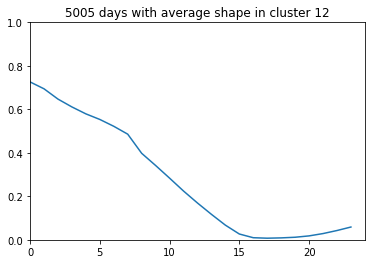

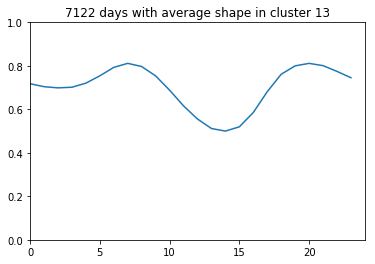

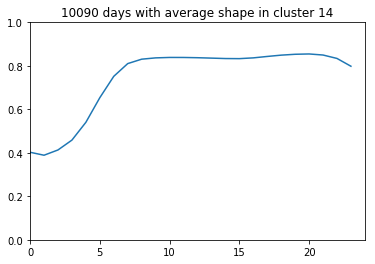

In [62]:
for i in range(clusters):
    values = totals[i] / counts[i]
    plt.gcf().clear()
    plt.axis([0, 24, 0, 1])
    plt.plot(values)
    plt.title(str(counts[i]) + " days with average shape in cluster " + str(i))
    plt.savefig('kmeans/average' + str(i) + ".png")
    plt.show()


In [59]:
len(normalized)

534306

In [ ]:

with open('cf/6481_1SGA_2016.csv', 'rb') as csvfile:
    dr = csv.DictReader(csvfile)
    to_insert = []
    for row in dr:
        to_insert.append(float(row['capacity_factor']))
        if int(row['']) % 24 is 23:
            to_plot.append(to_insert)
            to_test.append(to_insert + np.gradient(to_insert).tolist())
            labels.append((row['op_date'], row['name'], row['unitid']))
            to_insert = []